In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('marketing_campaign.csv.xls',sep="\t")

In [3]:
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
print(f"Informations Of The Dataset :\n")
print(data.info())

Informations Of The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDeal

In [5]:
data.dropna(axis = 0, inplace = True)
print(f"After dropping null values, the shape of the Dataset is {data.shape}")
print(f"After dropping null values, null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#F8F8FF","color":"#080808","border": "1.5px solid black"})

After dropping null values, the shape of the Dataset is (2216, 29)
After dropping null values, null values of the Dataset :


In [6]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

print(f"Newest customer's enrolment date is {max(dates)}")
print(f"Oldest customer's enrolment date is {min(dates)}")

Newest customer's enrolment date is 2014-12-06
Oldest customer's enrolment date is 2012-01-08


In [7]:
days = []
newest = max(dates) 
for i in dates:
    duration = newest - i
    days.append(duration)
data["Customer Loyalty"] = days
data["Customer Loyalty"] = data["Customer Loyalty"].dt.days
data["Age"] = 2015 - data["Year_Birth"]
data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
data["Children"] = data["Kidhome"] + data["Teenhome"]
data["Parental Status"] = np.where(data["Children"] > 0, 1, 0)
data["Marital_Status"].replace({"Married":"Couple", "Together":"Couple", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"}, inplace = True)
data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"}, inplace = True)
data["Total Promo"] =  data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
data.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog","NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"}, inplace = True)
data = data[["ID","Age","Education","Marital Status","Parental Status","Children","Kidhome","Teenhome","Income","Spent","Customer Loyalty","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","Total Promo","NumWebVisitsMonth"]]

data = data[data["Age"] < 90]
data = data[data["Income"] < 600000]


In [8]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#F8F8FF","color":"#080808","border": "1.5px solid black"})

In [9]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#F8F8F8","figure.facecolor":"#F8F8F8"})
sns.set_context("poster",font_scale = .7)

palette = ["#2F4F4F","#556B2F","#8FBC8F","#FFDAB9","#FFA07A","#CD5C5C","#800000"]
palette_cmap = ["#D3D3D3","#B0C4DE","#F3AB60","#9F8A78","#9E726F","#682F2F"]
cluster = ["#D3D3D3","#682F2F","#8FBC8F","#FFA07A"]

The distribution of customer's income and spending:


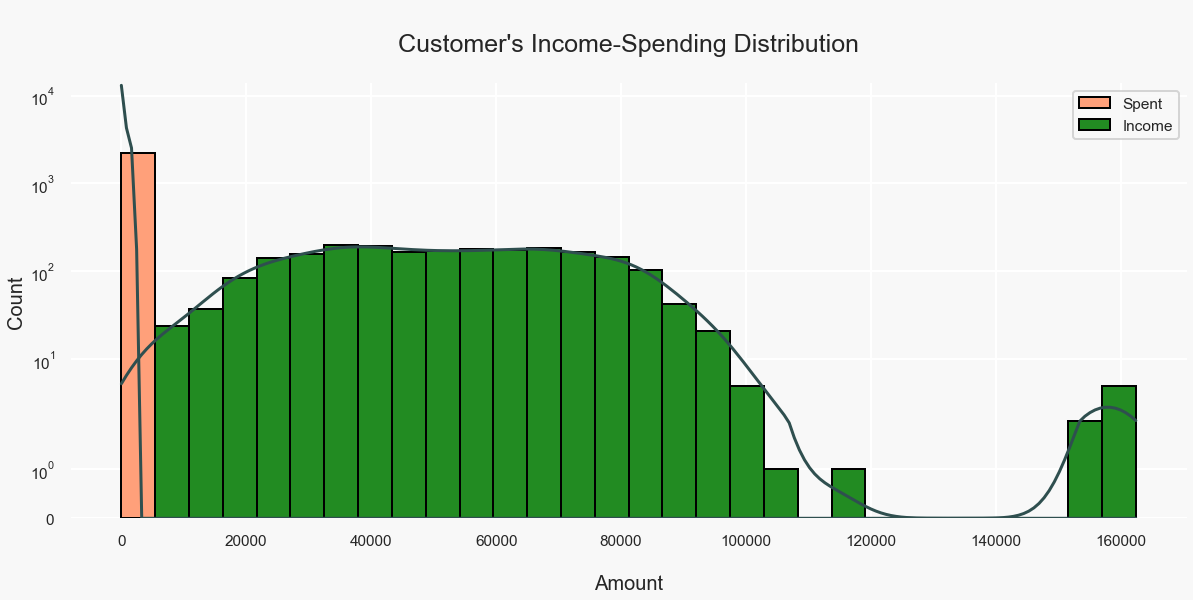

In [10]:
print(f"The distribution of customer's income and spending:")
plt.subplots(figsize=(20, 8))
p = sns.histplot(data[["Spent","Income"]], palette=["#FFA07A", "#228B22"], kde=True, bins=30, alpha=1, fill=True, edgecolor="black")
p.axes.lines[0].set_color(palette[0])
p.axes.lines[1].set_color(palette[0])
p.axes.set_yscale("symlog")
p.axes.set_title("\nCustomer's Income-Spending Distribution\n", fontsize=25)
plt.ylabel("Count", fontsize=20)
plt.xlabel("\nAmount", fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

The distribution of customer's age:


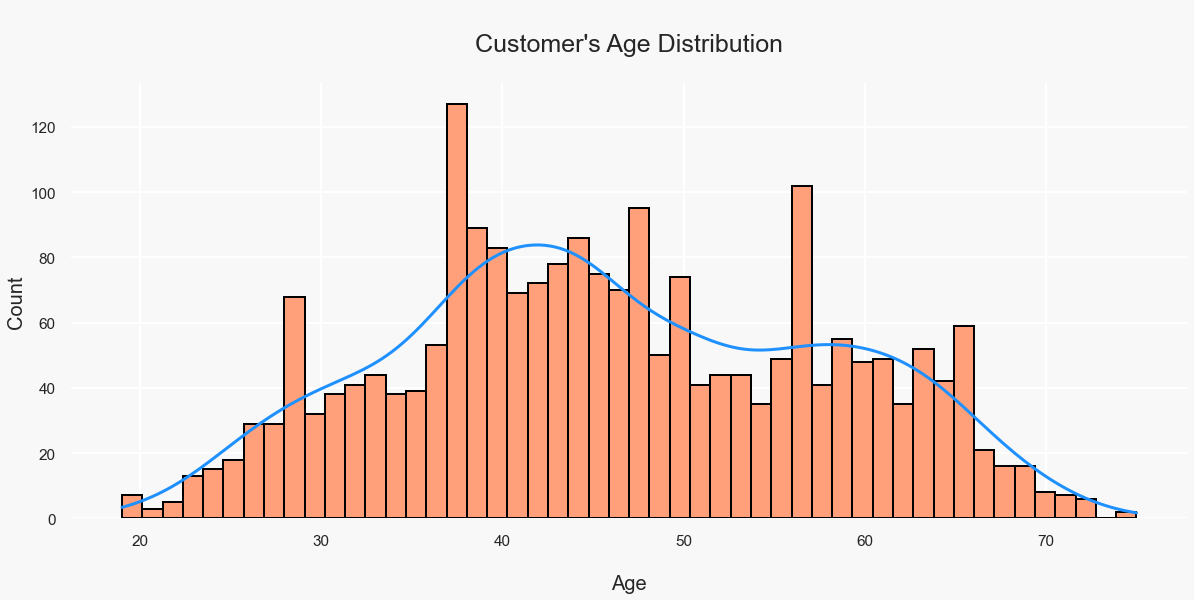

In [11]:
print(f"The distribution of customer's age:")

plt.subplots(figsize=(20, 8))
p = sns.histplot(data["Age"], color="#FFA07A", kde=True, bins=50, alpha=1, fill=True, edgecolor="black")
p.axes.lines[0].set_color("#1E90FF")
p.axes.set_title("\nCustomer's Age Distribution\n", fontsize=25)
plt.ylabel("Count", fontsize=20)
plt.xlabel("\nAge", fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()


The customer's education:


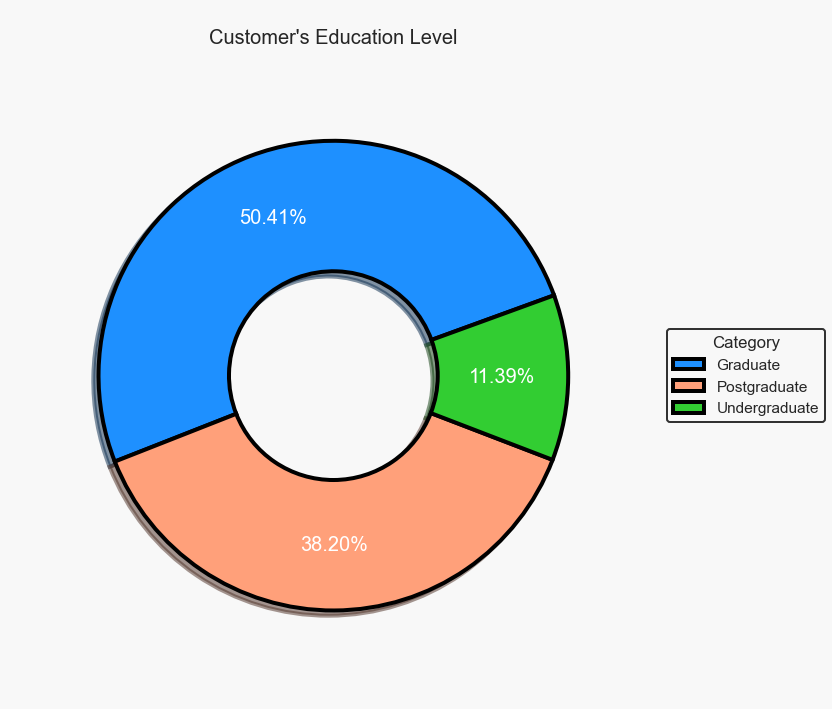

In [12]:
print(f"The customer's education:")
plt.subplots(figsize=(12, 12))

labels = "Graduate", "Postgraduate", "Undergraduate"
size = 0.5

wedges, texts, autotexts = plt.pie([data["Education"].value_counts()[0],
                                    data["Education"].value_counts()[1],
                                    data["Education"].value_counts()[2]],
                                    explode=(0, 0, 0),
                                    textprops=dict(size=20, color="white"),
                                    autopct="%.2f%%",
                                    pctdistance=0.72,
                                    radius=.9,
                                    colors=["#1E90FF", "#FFA07A", "#32CD32"],
                                    shadow=True,
                                    wedgeprops=dict(width=size, edgecolor="black", linewidth=4),
                                    startangle=20)

plt.legend(wedges, labels, title="Category", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), edgecolor="black")
plt.title("\nCustomer's Education Level", fontsize=20)
plt.show()

The distribution of customer's income and spending on basis of education level:


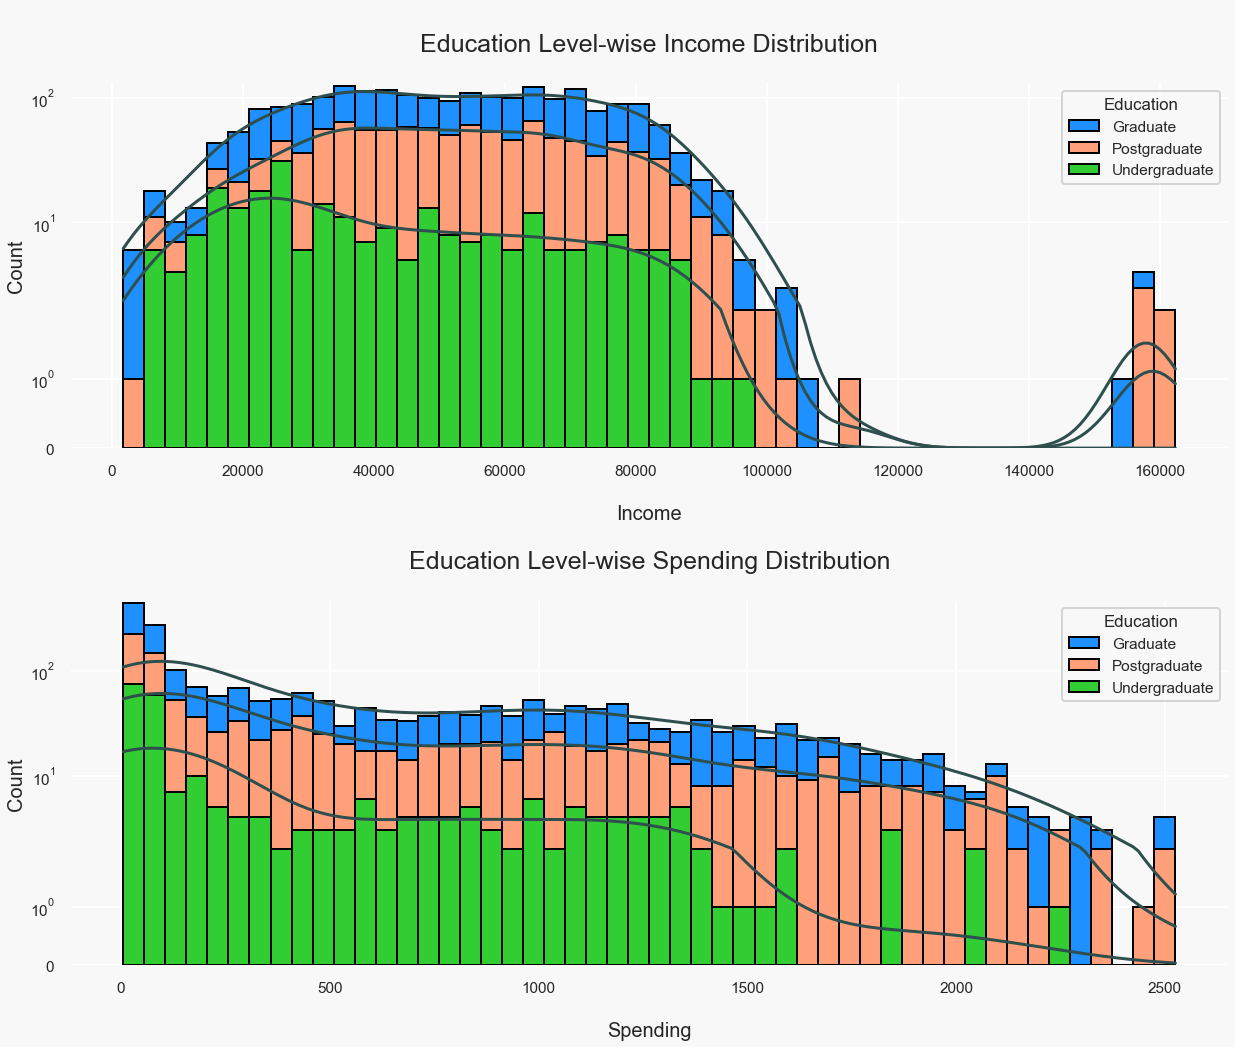

In [13]:
print(f"The distribution of customer's income and spending on basis of education level:")

_, axes = plt.subplots(2, 1, figsize=(20, 16), sharex=False)
plt.tight_layout(pad=7.0)

sns.histplot(data=data, x="Income", hue="Education", multiple="stack", palette=["#1E90FF", "#FFA07A", "#32CD32"], ax=axes[0], kde=True, bins=50, alpha=1, fill=True, edgecolor="black")
axes[0].lines[0].set_color(palette[0])
axes[0].lines[1].set_color(palette[0])
axes[0].lines[2].set_color(palette[0])
axes[0].set_yscale("symlog")
axes[0].set_title("\nEducation Level-wise Income Distribution\n", fontsize=25)
axes[0].set_ylabel("Count", fontsize=20)
axes[0].set_xlabel("\nIncome", fontsize=20)

sns.histplot(data=data, x="Spent", hue="Education", multiple="stack", palette=["#1E90FF", "#FFA07A", "#32CD32"], ax=axes[1], kde=True, bins=50, alpha=1, fill=True, edgecolor="black")
axes[1].lines[0].set_color(palette[0])
axes[1].lines[1].set_color(palette[0])
axes[1].lines[2].set_color(palette[0])
axes[1].set_yscale("symlog")
axes[1].set_title("\nEducation Level-wise Spending Distribution\n", fontsize=25)
axes[1].set_ylabel("Count", fontsize=20)
axes[1].set_xlabel("\nSpending", fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

The distribution of customer's income and spending on basis of marital and parental status:


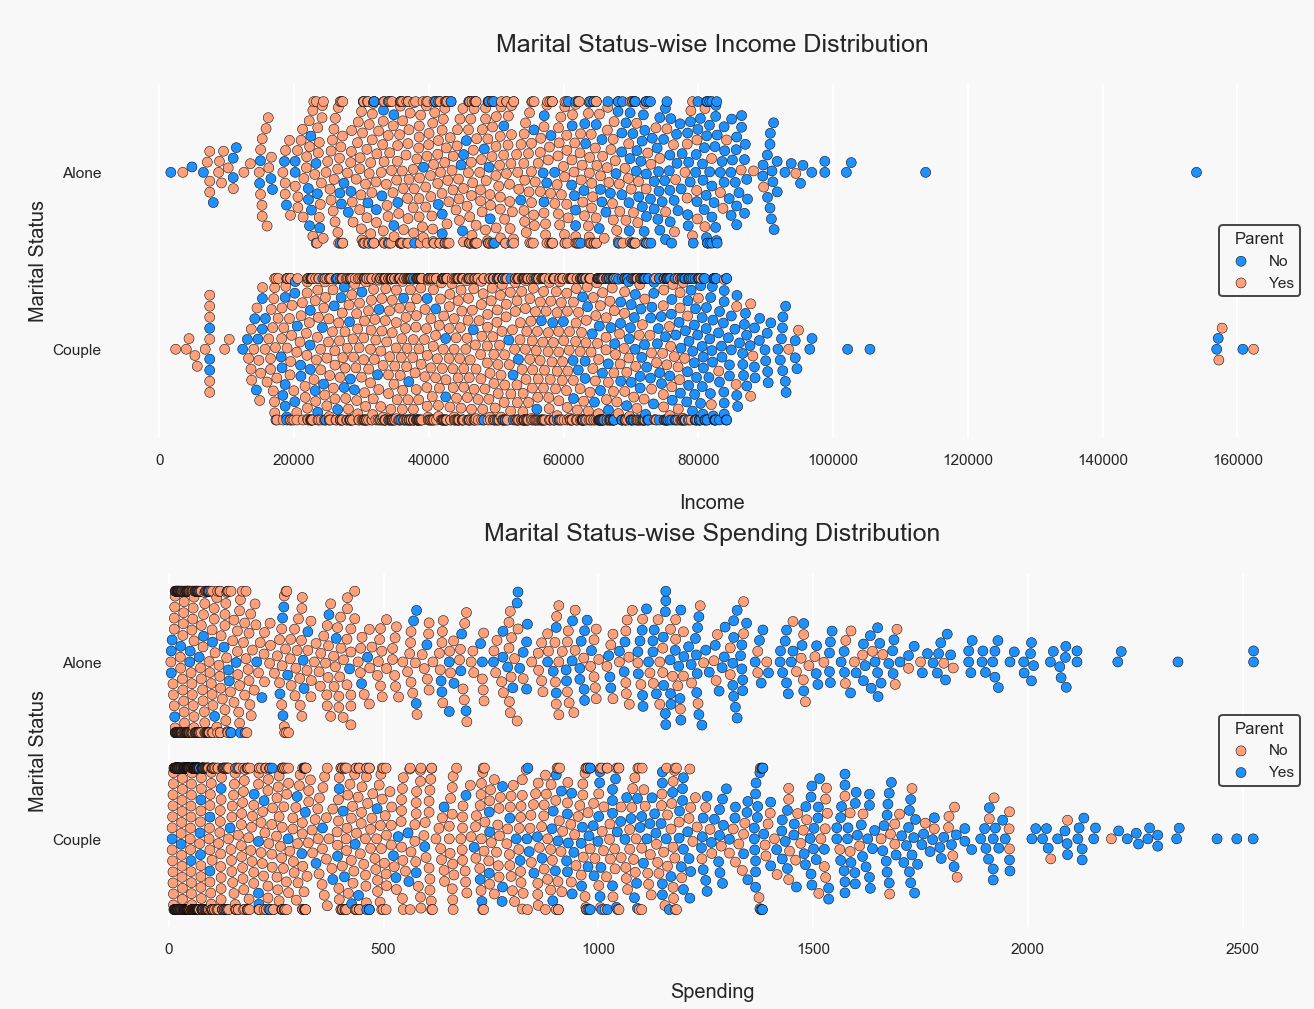

In [14]:
print(f"The distribution of customer's income and spending on basis of marital and parental status:")

_, axes = plt.subplots(2, 1, figsize=(20, 15), sharex=False)
plt.tight_layout(pad=6.0)

sns.swarmplot(x=data["Income"], y=data["Marital Status"], hue=data["Parental Status"], palette=["#1E90FF", "#FFA07A"], ax=axes[0], marker="o", size=10, alpha=1, linewidth=0.5, edgecolor="black")
axes[0].legend(["No", "Yes"], title="Parent", edgecolor="#1c1c1c", loc="center right")
axes[0].set_title("\nMarital Status-wise Income Distribution\n", fontsize=25)
axes[0].set_xlabel("\nIncome", fontsize=20)
axes[0].set_ylabel("\nMarital Status", fontsize=20)

sns.swarmplot(x=data["Spent"], y=data["Marital Status"], hue=data["Parental Status"], palette=["#1E90FF", "#FFA07A"], ax=axes[1], marker="o", size=10, alpha=1, linewidth=0.5, edgecolor="black")
axes[1].legend(["No", "Yes"], title="Parent", edgecolor="#1c1c1c", loc="center right")
axes[1].set_title("\nMarital Status-wise Spending Distribution\n", fontsize=25)
axes[1].set_xlabel("\nSpending", fontsize=20)
axes[1].set_ylabel("\nMarital Status", fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

The distribution of customer's children:


AttributeError: 'BarContainer' object has no attribute 'get_offsets'

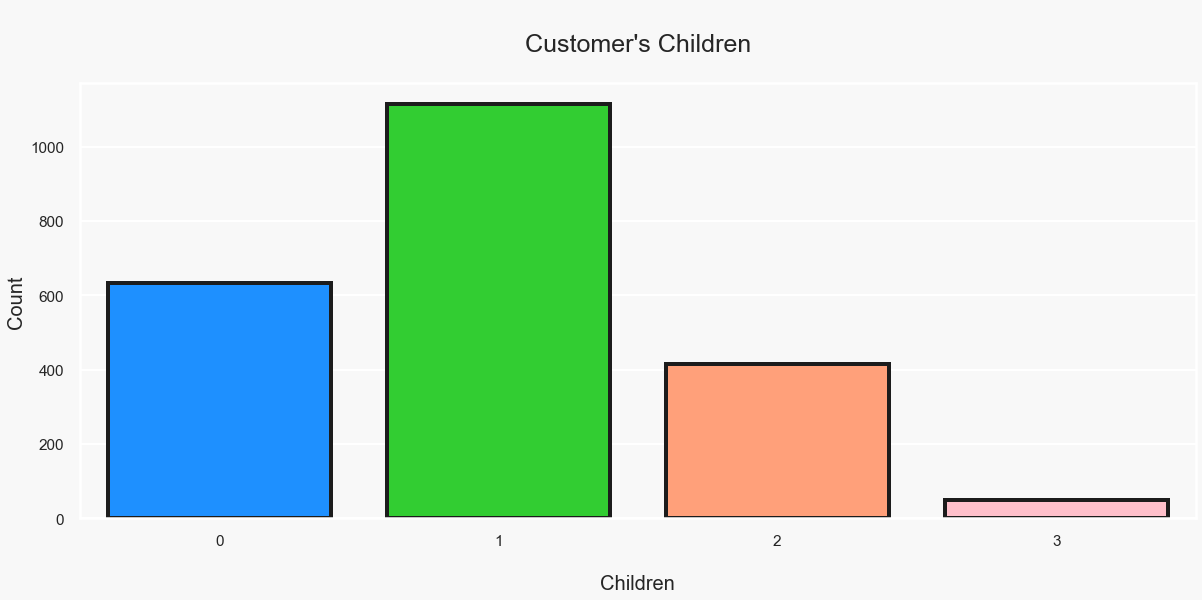

In [15]:
print(f"The distribution of customer's children:")

plt.subplots(figsize=(20, 8))
p = sns.countplot(x=data["Children"], palette=["#1E90FF", "#32CD32", "#FFA07A", "#FFC0CB"], saturation=1, edgecolor="#1c1c1c", linewidth=4)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Children\n", fontsize=25)
p.axes.set_ylabel("Count", fontsize=20)
p.axes.set_xlabel("\nChildren", fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(), rotation=0)

for container in p.containers:
    for i, child_count in enumerate(container.get_offsets()[:, 1]):
        p.annotate(str(int(child_count)), xy=(container.get_offsets()[i][0], child_count), ha='center', va='bottom', fontsize=20, color='black')

sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
catcol = ["Education", "Marital Status"]
le = LabelEncoder()
for col in catcol:
    data[col] = le.fit_transform(data[col])

plt.subplots(figsize=(20, 20))

sns.heatmap(data.drop(columns="ID").corr(), cmap="coolwarm", square=True, cbar_kws=dict(shrink=.82), 
            annot=True, vmin=-1, vmax=1, linewidths=0.1, linecolor='white', annot_kws=dict(fontsize=12))
plt.title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()